# Introduccion

La Inteligencia Computacional, es una rama antigua, y es lo que se refiere a la parte computacional de los inteligencia artificial. La inteligencia artificial se define como la capacidad de un sistema para adaptar su conducta frente a estímulos nuevos.

Como tal, la inteligencia artificial tiene una rama que se enfoca en el aprendizaje, y esto es lo que conocemos como Machine Learning. Y de este tiene tres tipos de aprendizaje: supervisado, no supervisado y reforzado. En este caso se enfocará en el aprendizaje supervisado.

El aprendizaje supervisado, consiste en "entrenar" un clasificador para que pueda determinar a que clase es el objeto que se da. En resumir poder clasificar patrones. Para esto recibe un "entrenamiento". Este consiste en que recibe una señal y luego se compara con el valor real, y en base a esto, se calcula el error. Mientras más pequeño el error, mejor se considera el clasificador. Con cada iteración se va modificando este valor.

Al terminar de entrenarlo, se "prueba" el clasificador con valores nuevos, y en base a sus resultados se concluye la calidad del modelo. Para esto hay varios tipos de clasificadores: En particular el que se usará es el Naive Bayes.

Este toma el teorema de Bayes para escoger cual de las dos clases es la más acertada. Esto se hace calculando la probabilidad de que sea clase $a$ versus sea clase $b$, y se escoge la mas alta. Para esto se necesita calcular la verosimilitud de las probabilidades.

Hay dos maneras de hacerlo: con Histograma, que es el modelo utilizado en la Pregunta 2, y con aproximaciones mediante Gaussianas, que es el modelo utilizado en la Pregunta 3.

Para hacer este experimento, se utilizan los datos de un conjunto de simulaciones, la idea es definir si el rayo descrito es un hadrón, o un no-hadron, para esto se describe en base a 10 características. Estos datos se exploran en mayor detalle en la sección de la Pregunta 1, donde se ve su histograma de distribución.

El primer modelo, se calcula un histograma para cada característica de los datos de entrenamientos. Así se generará 10 histogramas. Luego para calcular las probabilidades, se consultará su valor en un tabla, que será el histograma que se consiguió en el entrenamiento. Este proceso se hace para cada clase. Al final para obtener los resultados se calcula la Tasa de Verdaderos Positivos y la Tasa de Falsos Positivos, y se comparan mediante la curva ROC.

Para el segundo método, se obtiene la matriz de varianza y la media, en base a los datos de entrenamiento. Luego cuando se usan los datos de pruebas, se calcula el valor de la Gaussiana Multivariada usando la matriz de covarianza y la media. Al obtener el resultado se compara con el valor "real", y se obtiene la Tasa de Verdaderos Positivos y la Tasa de Falsos Positivos, las cuales son comparadas mediante la curva ROC. Además de esta, también se calcula la curva Precision-Recall, en base a como su nombre lo indica la Precision y el Recall de los datos.

Por ultimo, en la Pregunta 4, se comparan los dos modelos con las curvas ROC, y Precision-Recall, mediante variando el valor de $\theta$, que sería como la tolerancia del modelo. Si la tasa de la probabilidad de la clase $a$ versus el $b$ es mayor a este $\theta$, entonces se escoge la clase 1, sino la clase 0.

Para esto se usaran las librerías de numpy, scikit-learn, pandas y matplotlib.

# Desarrollo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

## Pregunta 1

Primero cargamos los datos del *magic04.data*, con la libreria pandas.

In [3]:
datos=pd.read_csv("magic04.data",  names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
)

Luego separamos los datos en dos clases: Hadrones y no Hadrones. Identificando a $g$ como la clase de los no hadrones, y a $h$ como la clase de los hadrones.

In [4]:
noHadrones=datos[datos['class']=='g']
hadrones=datos[datos['class']=='h']

print(hadrones)

        fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
12332   93.7035  37.9432  3.1454  0.1680  0.1011   53.2566   89.0566   
12333  102.0005  22.0017  3.3161  0.1064  0.0724  -54.0862   43.0553   
12334  100.2775  21.8784  3.1100  0.3120  0.1446  -48.1834   57.6547   
12335   91.6558  18.8293  2.7097  0.4386  0.3420  -52.6841  -97.8373   
12336   38.0195  12.6736  2.8747  0.4084  0.1928  -51.4840    8.3471   
...         ...      ...     ...     ...     ...       ...       ...   
19015   21.3846  10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452   6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135  76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814  53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
12332   11.8175  14.1224  231.9028     h  
12333  -15.0647  88.4636  274.9392     h  
12334 

Hacemos un histograma para cada caractaristica, y para cada clase.
Primero, empezamos con la caracteristica 'fLength'.

Text(0.5, 1.0, 'Histograma de Frecuencia para la caracteristica fLength')

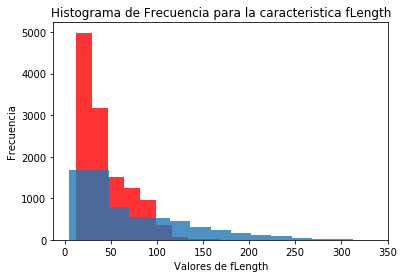

In [631]:
fLengthClass0=noHadrones['fLength']
fLengthClass1=hadrones['fLength']

plt.hist(fLengthClass0,15, alpha=0.8, color='r')

plt.hist(fLengthClass1,15, alpha=0.8)
plt.xlabel('Valores de fLength')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencia para la caracteristica fLength')
#plt.hist(datos['fLength'],15,alpha=0.8,color='b')

Podemos ver que la clase 0, la clase no hadron, y la clase 1, la clase hadron, tienen distribuciones de datos muy similares, al punto que con solo los datos que tenemos de está caracteristicas, no son linealmente separables. Se puede concluir en base al histograma que los no hadrones poseen largo más grande que el de los hadrones.

Veremos ahora con su segunda característica.

In [6]:
fWidthClass0=noHadrones['fWidth']
fWidthClass1=hadrones['fWidth']

(array([1.210e+03, 2.598e+03, 9.050e+02, 4.880e+02, 3.620e+02, 2.900e+02,
        2.540e+02, 1.730e+02, 1.500e+02, 8.400e+01, 7.000e+01, 3.600e+01,
        1.400e+01, 1.600e+01, 1.200e+01, 1.000e+01, 6.000e+00, 2.000e+00,
        4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00]),
 array([  0.     ,  10.25528,  20.51056,  30.76584,  41.02112,  51.2764 ,
         61.53168,  71.78696,  82.04224,  92.29752, 102.5528 , 112.80808,
        123.06336, 133.31864, 143.57392, 153.8292 , 164.08448, 174.33976,
        184.59504, 194.85032, 205.1056 , 215.36088, 225.61616, 235.87144,
        246.12672, 256.382  ]),
 <a list of 25 Patch objects>)

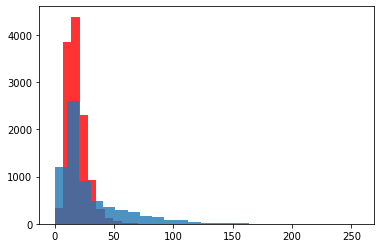

In [7]:
plt.hist(fWidthClass0,25, alpha=0.8, color='r')
plt.hist(fWidthClass1,25, alpha=0.8)

Viendo el histograma, nos da resultados muy similares al histograma de la caracteristica anterior, y se puede sacar la misma conclusion, los no hadrones son generalmente mas grande que los hadrones, y que ademas no son linealmente separables con esta caracteristica.

Veamos con la tercera caracteristica 'fSize'

In [8]:
fSizeClass0=noHadrones['fSize']
fSizeClass1=hadrones['fSize']

(array([ 15.,  99., 211., 400., 612., 780., 797., 692., 570., 437., 410.,
        378., 301., 268., 183., 133.,  94.,  75.,  57.,  59.,  34.,  31.,
         22.,  16.,   5.,   2.,   3.,   1.,   2.,   1.]),
 array([1.9413    , 2.05403333, 2.16676667, 2.2795    , 2.39223333,
        2.50496667, 2.6177    , 2.73043333, 2.84316667, 2.9559    ,
        3.06863333, 3.18136667, 3.2941    , 3.40683333, 3.51956667,
        3.6323    , 3.74503333, 3.85776667, 3.9705    , 4.08323333,
        4.19596667, 4.3087    , 4.42143333, 4.53416667, 4.6469    ,
        4.75963333, 4.87236667, 4.9851    , 5.09783333, 5.21056667,
        5.3233    ]),
 <a list of 30 Patch objects>)

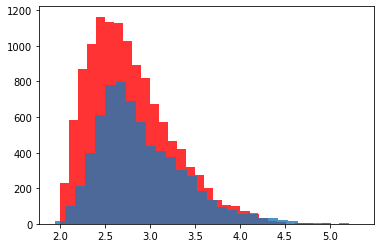

In [9]:
plt.hist(fSizeClass0,30,alpha=0.8,color='r', label='class0')
plt.hist(fSizeClass1,30,alpha=0.8, label='class1')

Se puede notar, que las dos curvas son muy similares entre sí, como una Gaussiana corrida hacia un lado, sin embargo tienen picos de distinto tamaños, se ve que los no hadrones tienden a ser de mayor tamaño que los hadrones.

Veamos la cuarta caracteristica 'fConc' y la quinta 'fConc1'

In [10]:
fConcClass0=noHadrones['fConc']
fConcClass1=hadrones['fConc']

(array([ 61., 164., 287., 373., 423., 417., 435., 430., 414., 419., 435.,
        410., 371., 330., 300., 315., 266., 196., 149., 123., 127., 109.,
         77.,  41.,  16.]),
 array([0.0131  , 0.048296, 0.083492, 0.118688, 0.153884, 0.18908 ,
        0.224276, 0.259472, 0.294668, 0.329864, 0.36506 , 0.400256,
        0.435452, 0.470648, 0.505844, 0.54104 , 0.576236, 0.611432,
        0.646628, 0.681824, 0.71702 , 0.752216, 0.787412, 0.822608,
        0.857804, 0.893   ]),
 <a list of 25 Patch objects>)

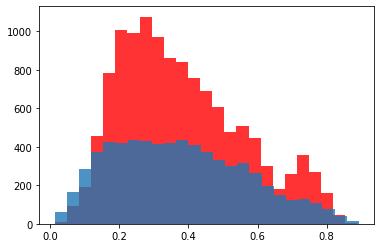

In [11]:
plt.hist(fConcClass0,25, alpha=0.8, color='r')
plt.hist(fConcClass1,25,alpha=0.8)

In [12]:
fConc1Class0=noHadrones['fConc1']
fConc1Class1=hadrones['fConc1']

(array([ 73., 264., 432., 533., 559., 552., 544., 523., 523., 474., 400.,
        371., 361., 269., 199., 157., 143., 104.,  77.,  52.,  22.,  27.,
         11.,  10.,   8.]),
 array([3.00000e-04, 2.60080e-02, 5.17160e-02, 7.74240e-02, 1.03132e-01,
        1.28840e-01, 1.54548e-01, 1.80256e-01, 2.05964e-01, 2.31672e-01,
        2.57380e-01, 2.83088e-01, 3.08796e-01, 3.34504e-01, 3.60212e-01,
        3.85920e-01, 4.11628e-01, 4.37336e-01, 4.63044e-01, 4.88752e-01,
        5.14460e-01, 5.40168e-01, 5.65876e-01, 5.91584e-01, 6.17292e-01,
        6.43000e-01]),
 <a list of 25 Patch objects>)

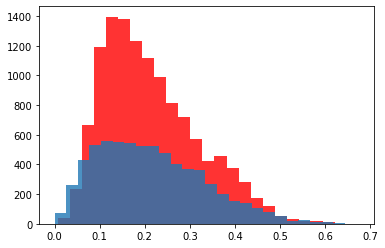

In [13]:
plt.hist(fConc1Class0,25,alpha=0.8, color='r')
plt.hist(fConc1Class1,25,alpha=0.8)

Podemos ver que estas dos caracteristicas tienen distribuciones muy similares entre sí, con la curva de los no hadrones teniendo forma de gaussiana pero corrida al lado, y los hadrones teniendo una distribucion totalmente distinta. Se ve que la curva de los hadrones es más pequeña en general, pero no posee tanta desviacion como la de los no hadrones. Aqui se puede ver que los hadrones y no hadrones pueden tener características muy distintas entre si.

Veamos la sexta caracteristica, 'fAsym'

In [14]:
fAsymClass0=noHadrones['fAsym']
fAsymClass1=hadrones['fAsym']

(array([2.000e+00, 3.000e+00, 8.000e+00, 3.400e+01, 6.700e+01, 1.090e+02,
        1.780e+02, 2.470e+02, 3.950e+02, 6.180e+02, 1.541e+03, 2.569e+03,
        5.750e+02, 1.870e+02, 7.300e+01, 2.800e+01, 1.700e+01, 9.000e+00,
        7.000e+00, 7.000e+00, 9.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00]),
 array([-457.9161  , -416.589828, -375.263556, -333.937284, -292.611012,
        -251.28474 , -209.958468, -168.632196, -127.305924,  -85.979652,
         -44.65338 ,   -3.327108,   37.999164,   79.325436,  120.651708,
         161.97798 ,  203.304252,  244.630524,  285.956796,  327.283068,
         368.60934 ,  409.935612,  451.261884,  492.588156,  533.914428,
         575.2407  ]),
 <a list of 25 Patch objects>)

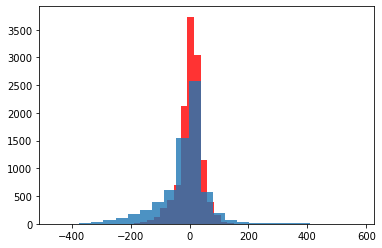

In [15]:
plt.hist(fAsymClass0,25,alpha=0.8,color='r')
plt.hist(fAsymClass1,25,alpha=0.8)

Aqui es donde tenemos la distribucion mas distintiva de entre todas, aqui tenemos un tipo de gaussiana muy picuda, con una media con un valor muy grande comparado a sus vecinos. Ademas, se puede añadir que la curva de los hadrones está desviada más para la izquierda, que la curva de los no hadrones, y posee un tope más pequeño. Salvo estas observaciones, las dos distribuciones son muy similares entre si.

Veamos la septima y octava, 'FM3Long' y 'FM3Trans'

In [16]:
fM3LongClass0=noHadrones['fM3Long']
fM3LongClass1=hadrones['fM3Long']

(array([2.000e+00, 1.000e+00, 1.200e+01, 1.500e+01, 1.700e+01, 2.000e+01,
        2.400e+01, 5.700e+01, 8.100e+01, 1.220e+02, 1.300e+02, 1.650e+02,
        2.080e+02, 2.130e+02, 2.440e+02, 3.440e+02, 8.450e+02, 7.680e+02,
        1.626e+03, 6.740e+02, 3.730e+02, 2.530e+02, 1.870e+02, 1.250e+02,
        8.500e+01, 5.500e+01, 1.800e+01, 1.500e+01, 4.000e+00, 5.000e+00]),
 array([-331.78      , -312.77663333, -293.77326667, -274.7699    ,
        -255.76653333, -236.76316667, -217.7598    , -198.75643333,
        -179.75306667, -160.7497    , -141.74633333, -122.74296667,
        -103.7396    ,  -84.73623333,  -65.73286667,  -46.7295    ,
         -27.72613333,   -8.72276667,   10.2806    ,   29.28396667,
          48.28733333,   67.2907    ,   86.29406667,  105.29743333,
         124.3008    ,  143.30416667,  162.30753333,  181.3109    ,
         200.31426667,  219.31763333,  238.321     ]),
 <a list of 30 Patch objects>)

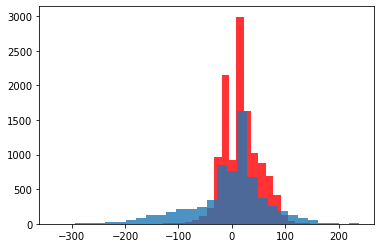

In [17]:
plt.hist(fM3LongClass0,30, alpha=0.8, color='r')
plt.hist(fM3LongClass1,30,alpha=0.8)

In [18]:
fM3TransClass0=noHadrones['fM3Trans']
fM3TransClass1=hadrones['fM3Trans']

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 5.000e+00,
        7.000e+00, 1.600e+01, 2.800e+01, 5.400e+01, 5.600e+01, 1.220e+02,
        1.710e+02, 3.040e+02, 7.520e+02, 1.789e+03, 1.790e+03, 7.810e+02,
        3.020e+02, 1.890e+02, 1.210e+02, 7.500e+01, 4.300e+01, 2.800e+01,
        1.900e+01, 2.000e+01, 6.000e+00, 1.000e+00, 2.000e+00, 2.000e+00]),
 array([-2.0589470e+02, -1.9303651e+02, -1.8017832e+02, -1.6732013e+02,
        -1.5446194e+02, -1.4160375e+02, -1.2874556e+02, -1.1588737e+02,
        -1.0302918e+02, -9.0170990e+01, -7.7312800e+01, -6.4454610e+01,
        -5.1596420e+01, -3.8738230e+01, -2.5880040e+01, -1.3021850e+01,
        -1.6366000e-01,  1.2694530e+01,  2.5552720e+01,  3.8410910e+01,
         5.1269100e+01,  6.4127290e+01,  7.6985480e+01,  8.9843670e+01,
         1.0270186e+02,  1.1556005e+02,  1.2841824e+02,  1.4127643e+02,
         1.5413462e+02,  1.6699281e+02,  1.7985100e+02]),
 <a list of 30 Patch objects>)

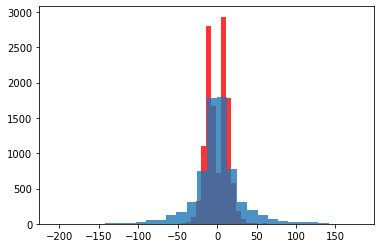

In [19]:
plt.hist(fM3TransClass0,30,alpha=0.8, color='r')
plt.hist(fM3TransClass1,30,alpha=0.8)

Estas distribuciones se parecen a la distribucion de 'fAsym', salvo por un cosa, la curva de los no hadrones posee dos picos en estas dos distribuciones. En la de 'fTrans' se puede ver hay dos puntos muy altos, y que en medio no hay valores en comun, sin embargo con la curva de los hadrones hay un curva gaussiana centrada. Con la curva 'fLong' ocurre algo similar, pero no tan drastico.

Y por ultimo vemos la novena y decima caracteristica, el 'fAlpha' y el 'fDist'

In [20]:
fAlphaClass0=noHadrones['fAlpha']
fAlphaClass1=hadrones['fAlpha']

(array([351., 337., 362., 379., 342., 336., 331., 349., 341., 339., 347.,
        335., 329., 325., 301., 325., 289., 314., 302., 354.]),
 array([9.7000000e-03, 4.5092150e+00, 9.0087300e+00, 1.3508245e+01,
        1.8007760e+01, 2.2507275e+01, 2.7006790e+01, 3.1506305e+01,
        3.6005820e+01, 4.0505335e+01, 4.5004850e+01, 4.9504365e+01,
        5.4003880e+01, 5.8503395e+01, 6.3002910e+01, 6.7502425e+01,
        7.2001940e+01, 7.6501455e+01, 8.1000970e+01, 8.5500485e+01,
        9.0000000e+01]),
 <a list of 20 Patch objects>)

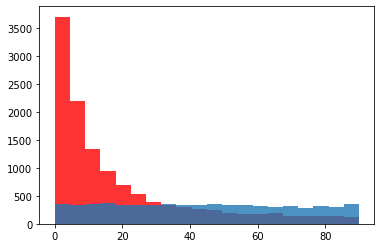

In [21]:
plt.hist(fAlphaClass0,20, alpha =0.8, color='r')
plt.hist(fAlphaClass1,20, alpha=0.8)

Esta de todas las distribuciones, es la más dispar de todas. La distribucion de los no hadrones es totalmente distinta a la de los hadrones, teniendo una curva descendente en el priemr caso y un curva plana en el segundo.

Para analizar más fondo la curva de los hadrones, se volvio a ver el histograma de este, pero está vez separado de la curva de los nos hadrones.

(array([56., 65., 77., 65., 88., 69., 53., 67., 85., 63., 68., 78., 65.,
        81., 70., 71., 72., 92., 69., 75., 76., 62., 64., 74., 66., 69.,
        64., 66., 61., 76., 63., 63., 73., 68., 64., 80., 76., 78., 60.,
        55., 65., 72., 58., 62., 84., 54., 70., 74., 65., 76., 64., 66.,
        78., 68., 71., 68., 60., 78., 65., 64., 71., 75., 67., 53., 63.,
        59., 60., 73., 63., 70., 53., 58., 60., 45., 85., 81., 68., 53.,
        67., 56., 55., 59., 59., 63., 53., 64., 64., 66., 48., 72., 73.,
        52., 61., 42., 74., 72., 64., 74., 62., 82.]),
 array([9.7000000e-03, 9.0960300e-01, 1.8095060e+00, 2.7094090e+00,
        3.6093120e+00, 4.5092150e+00, 5.4091180e+00, 6.3090210e+00,
        7.2089240e+00, 8.1088270e+00, 9.0087300e+00, 9.9086330e+00,
        1.0808536e+01, 1.1708439e+01, 1.2608342e+01, 1.3508245e+01,
        1.4408148e+01, 1.5308051e+01, 1.6207954e+01, 1.7107857e+01,
        1.8007760e+01, 1.8907663e+01, 1.9807566e+01, 2.0707469e+01,
        2.1607372e+01, 2.2

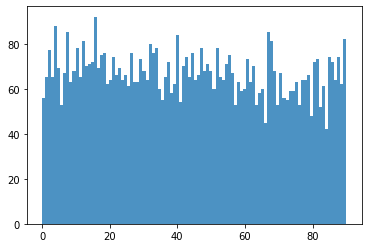

In [22]:
plt.hist(fAlphaClass1,100, alpha=0.8)

Se puede ver que no se parece en nada a la otra curva, siguiendo una distribución mas bien uniforme pero a la vez posee una subida y bajadas de valores del histograma sin ningun patron claro. Se considerará esta caracteristica como clave dado que son claramente disimilares.

In [23]:
fDistClass0=noHadrones['fDist']
fDistClass1=hadrones['fDist']

(array([ 26., 148., 241., 382., 484., 596., 651., 785., 831., 811., 539.,
        348., 284., 240., 159.,  97.,  47.,  13.,   5.,   1.]),
 array([  1.2826 ,  25.99652,  50.71044,  75.42436, 100.13828, 124.8522 ,
        149.56612, 174.28004, 198.99396, 223.70788, 248.4218 , 273.13572,
        297.84964, 322.56356, 347.27748, 371.9914 , 396.70532, 421.41924,
        446.13316, 470.84708, 495.561  ]),
 <a list of 20 Patch objects>)

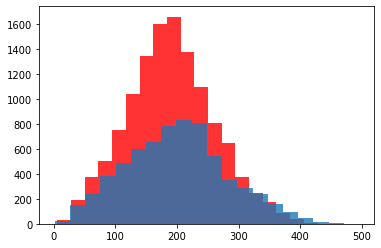

In [24]:
plt.hist(fDistClass0,20,alpha=0.8,color='r')
plt.hist(fDistClass1,20,alpha=0.8)

Aqui se ven dos gaussianas, con la curva de los no hadrones más alta y centrada que la curva de los hadrones. La curva de los hadrones parece más bien sesgada a cierta direccion. Tambien se aprecia que poseen una desviacion bastante similar.

Veamos la matriz de correlacion entre las caracteristicas: Primero veamos con la matriz de correlacion entre las dos clases.

In [5]:
datos=datos.replace(to_replace='g',value=0)
datos=datos.replace(to_replace='h',value=1)
datos.corr()

fLength    fWidth     fSize     fConc    fConc1     fAsym  \
fLength   1.000000  0.770512  0.702454 -0.630999 -0.598145 -0.368556   
fWidth    0.770512  1.000000  0.717517 -0.609779 -0.581141 -0.266961   
fSize     0.702454  0.717517  1.000000 -0.850850 -0.808835 -0.159863   
fConc    -0.630999 -0.609779 -0.850850  1.000000  0.976412  0.112272   
fConc1   -0.598145 -0.581141 -0.808835  0.976412  1.000000  0.100159   
fAsym    -0.368556 -0.266961 -0.159863  0.112272  0.100159  1.000000   
fM3Long  -0.119747 -0.176234  0.095157 -0.121899 -0.118769  0.274045   
fM3Trans  0.013389  0.039744  0.015455 -0.011294 -0.010966  0.002553   
fAlpha   -0.008777  0.066061 -0.186675  0.235272  0.229799 -0.055689   
fDist     0.418466  0.336816  0.437041 -0.328332 -0.304625 -0.206730   
class     0.307572  0.265596  0.117795 -0.024615 -0.004797 -0.173587   

           fM3Long  fM3Trans    fAlpha     fDist     class  
fLength  -0.119747  0.013389 -0.008777  0.418466  0.307572  
fWidth   -0.176234  0.039744  0.066061  0.336816  0.265596  
fSize     0.095157  0.015455 -0.186675  0.437041  0.117795  
fConc    -0.121899 -0.011294  0.235272 -0.328332 -0.024615  
fConc1   -0.118769 -0.010966  0.229799 -0.304625 -0.004797  
fAsym     0.274045  0.002553 -0.055689 -0.206730 -0.173587  
fM3Long   1.000000 -0.017197 -0.186275  0.037025 -0.193409  
fM3Trans -0.017197  1.000000  0.004659  0.011427  0.003837  
fAlpha   -0.186275  0.004659  1.000000 -0.220556  0.460979  
fDist     0.037025  0.011427 -0.220556  1.000000  0.065203  
class    -0.193409  0.003837  0.460979  0.065203  1.000000

Al relacionar 1 con "hadrones" y 0 con "no hadrones", obtenemos que la caracteristica más correlacionada con la clase "hadrones" es fAlpha, que es lo que se sospechaba al ver su histograma.

Si separamos esto por clase, se puede ver que:

In [16]:
matrizNoHadrones=abs(noHadrones.corr())
matrizNoHadrones

fLength    fWidth     fSize     fConc    fConc1     fAsym  \
fLength   1.000000  0.695646  0.766119  0.710201  0.679977  0.120237   
fWidth    0.695646  1.000000  0.855156  0.761339  0.731427  0.002603   
fSize     0.766119  0.855156  1.000000  0.863438  0.825388  0.029023   
fConc     0.710201  0.761339  0.863438  1.000000  0.979331  0.033395   
fConc1    0.679977  0.731427  0.825388  0.979331  1.000000  0.037631   
fAsym     0.120237  0.002603  0.029023  0.033395  0.037631  1.000000   
fM3Long   0.542494  0.422040  0.540958  0.452183  0.433914  0.162438   
fM3Trans  0.012365  0.044029  0.022637  0.017358  0.016044  0.005629   
fAlpha    0.443254  0.296896  0.458027  0.482306  0.463505  0.004521   
fDist     0.602484  0.389203  0.459633  0.368563  0.347069  0.178247   

           fM3Long  fM3Trans    fAlpha     fDist  
fLength   0.542494  0.012365  0.443254  0.602484  
fWidth    0.422040  0.044029  0.296896  0.389203  
fSize     0.540958  0.022637  0.458027  0.459633  
fConc     0.452183  0.017358  0.482306  0.368563  
fConc1    0.433914  0.016044  0.463505  0.347069  
fAsym     0.162438  0.005629  0.004521  0.178247  
fM3Long   1.000000  0.008227  0.271444  0.294721  
fM3Trans  0.008227  1.000000  0.007360  0.009829  
fAlpha    0.271444  0.007360  1.000000  0.425098  
fDist     0.294721  0.009829  0.425098  1.000000

Se puede ver que para clase noHadrones, las clases mas correlacionadas son:


*   fConc-fConc1 = 0.979331
*   fSize- fConc = 0.863438
*   fSize- fWidth = 0.855156
*   fSize- fConc1 = 0.825388
*   fLength - fSize = 0.766119
 
Y las 5 menos son:



*   fAsym - fWidth = 0.002603
*   fAsym - fAlpha = 0.004521
*   fAsym - fM3Long = 	0.005629
*   fM3Trans -fAlpha = 0.007360	
*   fM3Trans - fDist = 0.009829




In [15]:
matrizHadrones=abs(hadrones.corr())
matrizHadrones

fLength    fWidth     fSize     fConc    fConc1     fAsym  \
fLength   1.000000  0.773884  0.747319  0.688524  0.651879  0.423194   
fWidth    0.773884  1.000000  0.790355  0.672618  0.638750  0.304118   
fSize     0.747319  0.790355  1.000000  0.839128  0.796837  0.305340   
fConc     0.688524  0.672618  0.839128  1.000000  0.972725  0.238806   
fConc1    0.651879  0.638750  0.796837  0.972725  1.000000  0.220317   
fAsym     0.423194  0.304118  0.305340  0.238806  0.220317  1.000000   
fM3Long   0.307349  0.296956  0.223553  0.124154  0.115716  0.285738   
fM3Trans  0.013007  0.039519  0.010992  0.007704  0.008235  0.006849   
fAlpha    0.009282  0.041617  0.004228  0.010714  0.015137  0.053334   
fDist     0.325267  0.354997  0.394842  0.267684  0.245179  0.229049   

           fM3Long  fM3Trans    fAlpha     fDist  
fLength   0.307349  0.013007  0.009282  0.325267  
fWidth    0.296956  0.039519  0.041617  0.354997  
fSize     0.223553  0.010992  0.004228  0.394842  
fConc     0.124154  0.007704  0.010714  0.267684  
fConc1    0.115716  0.008235  0.015137  0.245179  
fAsym     0.285738  0.006849  0.053334  0.229049  
fM3Long   1.000000  0.026806  0.001489  0.131121  
fM3Trans  0.026806  1.000000  0.010832  0.013150  
fAlpha    0.001489  0.010832  1.000000  0.097112  
fDist     0.131121  0.013150  0.097112  1.000000

Se puede ver que las 5 caracteristicas mas correlacionadas son:


*   fConc- fConc1 = 0.972725
*   fSize- fConc = 0.839128
*   fConc1-fSize = 0.796837
*   fSize- fWidth = 0.790355
*   fWidth - fLength = 0.773884

Y las 5 menos correlacionadas son:



*   fM3Long - fAlpha = 0.001489
*   fSize- fAlpha = 0.004228
*   fM3Trans - fAsym = 0.006849
*   fConc - fM3Trans = 0.007704
*   fConc1 - fM3Trans = 0.008235






Ahora graficamos los dos pares de caracteristicas más correlacionadas entre sí.
Para los dos casos es fConc y fCon1, y fSize- fConc.

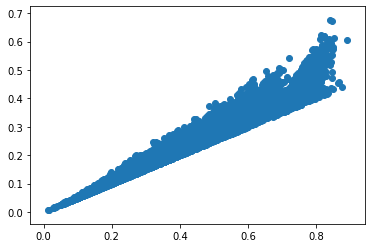

In [27]:
plt.scatter(fConcClass0,fConc1Class0)

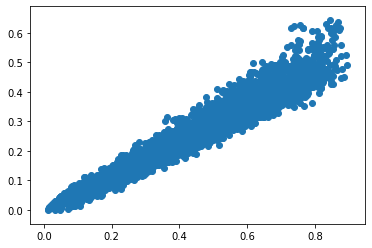

In [28]:
plt.scatter(fConcClass1,fConc1Class1)

Ahora con fSize- fConc:

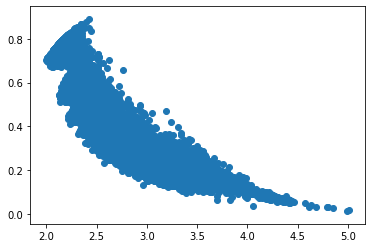

In [29]:
plt.scatter(fSizeClass0, fConcClass0)

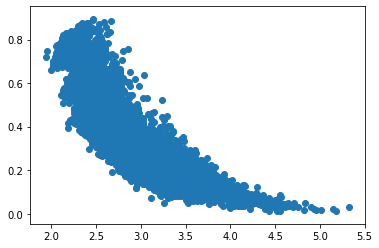

In [30]:
plt.scatter(fSizeClass1, fConcClass1)

Para el primer par de caracteristicas se ve que hay una relacion lineal entre las dos caracteristicas por lo que ambas caracteristicas están muy correlacionadas como mostraba la matriz de correlacion.

Respecto al segundo par, igual se puede ver una curva, pero es más gruesa que con el par anterior, y en vez de ser directamente proporcional, parece ser inversamente proporcional. Al igual que con el par anterior, dada la muy definida curva para las dos clases, se puede concluir que estas categorias están muy relacionadas entre sí.


Ahora hacemos lo mismo pero con las caracteristicas menos correlacionadas entre sí:

Para no hadrones es fAsym - fWidth:

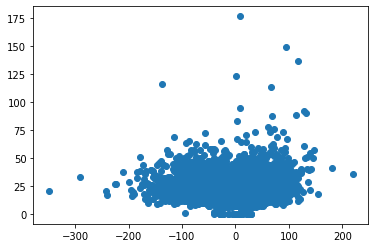

In [31]:
plt.scatter(fAsymClass0,fWidthClass0)

Se ve que los puntos están acumulados dentro de una zona, pero no forma un curva o linea que indique que haya una relacion lineal o de otro tipo. Ahora si probamos con el segundo par de caracteristicas menos correlacionadas, es fAsym - fAlpha:

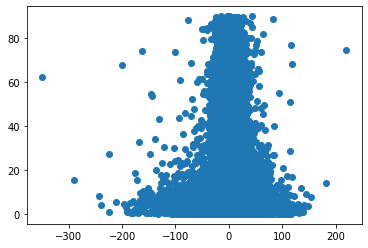

In [32]:
plt.scatter(fAsymClass0,fAlphaClass0)

Se puede ver una linea en el grafico, sin embargo no representa ninguna curva que sea una funcion, por lo que no se puede definir una relacion.

Para los hadrones es fM3Long - fAlpha:

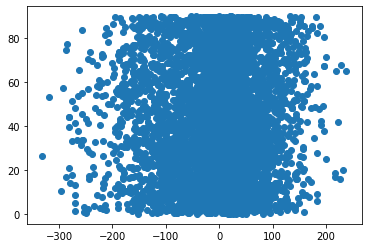

In [33]:
plt.scatter(fM3LongClass1,fAlphaClass1)

Se ve bastante más desordenado que con los NoHadrones, y no se puede establecer ningun tipo de patrón. Ahora probamos con el segundo par, con fSize- fAlpha.

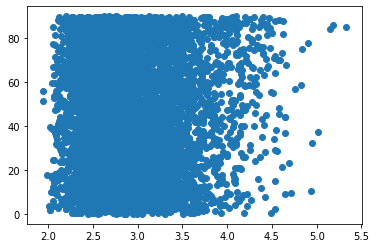

In [34]:
plt.scatter(fSizeClass1,fAlphaClass1)

Se puede notar la diferencia entre las caracteristicas menos correlacionadas con las mas, pues en las más, se ve una linea, mientras que en las otras no se forma ningun tipo de curva. En el caso de los hadrones, solo se ven un grupo de puntos acumulados en una zona, pero que no es capaz de forma una curva.

Ahora conseguimos graficar el Heatmap de tanto la clase no Hadrón como la clase Hadrón. Primero empezamos con la clase no Hadrón.

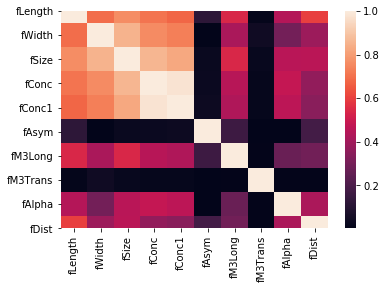

In [17]:
sb.heatmap(matrizNoHadrones)

Se puede ver lo que se mencionaba antes, mientras más blanco es el punto más correlacionadas están entre sí y esto se puede notar con la caracteristica fSize con fWidth y fConc. Como tambien fConc con fConc2.

Respecto a las caracteristicas menos relacionadas, se puede ver que fAsym posee poca correlacion con todas, y lo mismo con fM3Trans, que es lo que se evidenciaba con la matriz de correlacion que vimos antes.

Ahora, hacemos lo mismo pero con la clase Hadrón

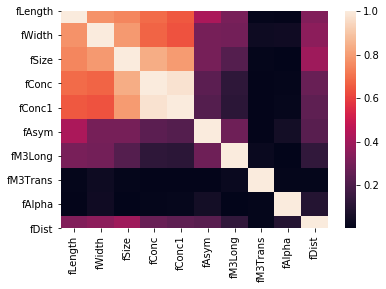

In [18]:
sb.heatmap(matrizHadrones)

Se aprecia lo que se corrobara con la matriz de correlacion, que fSize está correlacionado con fConc, y que fConc con fConc1. Tambien se aprecia que las caracteristicas menos correlacionadas son distintas a la de los no hadrones, puesto que aquí fAlpha es la caracteristica menos correlacionada con las otras, a diferencia de fAsym que es la menos correlacionada con los no Hadrones. FM3Trans sigue al igual que con los no hadrones, sin poseer mucha correlacion con las otras caracteristicas.

# Pregunta 2

Vamos a usar el clasificador de Bayes, necesitamos dividir el conjunto en dos subconjuntos: el de entrenamiento y el de prueba. Este se dividirá en en 80% entrenamiento y 20% prueba.

### Particionando el Set

In [6]:
import sklearn.utils
import math

In [7]:
df = sklearn.utils.shuffle(datos)

trainingSize=int(df.shape[0]*0.8)
testSize=df.shape[0]-trainingSize

df.reset_index(inplace=True, drop=True)
vector=np.arange(df.size).tolist()
df=df.assign(index=lambda x: x.index+1)
testSet=df.loc[:testSize,:]
trainingSet=df.loc[testSize+1:,:]

trainingSet

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
3805    26.4601   15.9796  2.3747  0.3797  0.2089    1.2693    5.2042   
3806    37.1132   12.3937  2.8949  0.3401  0.1790   13.4391   21.4918   
3807    30.3256   15.9097  2.4639  0.4467  0.2526   38.2613    8.0953   
3808    31.9774   11.9107  2.7723  0.4088  0.2255   -6.8707   19.3197   
3809    24.8732   10.6854  2.3971  0.5170  0.3307   13.7192   20.6316   
...         ...       ...     ...     ...     ...       ...       ...   
19015   13.1787   10.8308  2.2082  0.7740  0.4241   14.4768   -2.7238   
19016   38.3448   14.1032  2.8238  0.3781  0.2093   40.6911   26.0716   
19017   93.3756   56.9617  3.3768  0.1600  0.0825   -7.6621   18.5969   
19018  140.5780   33.8769  2.9959  0.2161  0.1106  126.1110  113.4860   
19019  235.3670  108.8140  4.1361  0.0526  0.0280 -284.7810 -163.2770   

       fM3Trans   fAlpha     fDist  class  index  
3805     4.5312  38.5430   39.9789      0   3806  
3806    -5.7741  46.9290  135.5520      1   3807  
3807     9.8041  32.7886  186.1560      1   3808  
3808   -10.7704   6.4600  173.8460      0   3809  
3809    -7.3335   1.7270  201.0700      0   3810  
...         ...      ...       ...    ...    ...  
19015  -11.6297  27.1060  197.2640      0  19016  
19016   -5.8822   0.1899  177.9740      0  19017  
19017   32.2942  47.4540  332.2960      1  19018  
19018   -8.1873  87.3467  113.6530      1  19019  
19019  -50.4738  59.6710  171.6980      1  19020  

[15215 rows x 12 columns]

### Ahora definimos el clasificador de Bayes.

Primero creamos el Entrenador que entrenará el clasificador con un histograma. Para ello primero creamos la clase que creará el histograma para cada caracteristica y clase. La verosimilitud se calculará considerando a cada valor como independientes entre sí, por lo que se multiplicaran entre sí.

In [8]:
import operator
#Creamos el histograma, que despues se usará en la verosimilitud, y para clasificar.
def EntrenamientoBayes(x,bins,c,classB):
    hist={}
    size=int(len(x))
    valor=x[c]
    k=0
    if (x['class'].any()==classB):
        x=x[x['class']==classB]
    hist[c]=np.histogram(x[c],bins)
    return hist

Ahora calculamos todos los histogramas usando una rutina.

In [59]:
bins=10
clases=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']



c=len(clases)
matrizHistogramaClass0={}
matrizHistogramaClass1={}
for i in clases:
    matrizHistogramaClass0[i]=EntrenamientoBayes(trainingSet,bins,i,0)
    matrizHistogramaClass1[i]=EntrenamientoBayes(trainingSet,bins,i,1)



Definimos la siguiente función, con el proposito de que está obtenga los valores de los histogramas dependiendo de la clase y la característica.

In [28]:
def ObtenerValorHistogramaClass0(x,c,indice):
    histograma=matrizHistogramaClass0.get(c).get(c)
    
    if(indice <=0):
        return histograma[0][0]
    if (indice >= (len(histograma)-1)):
        return histograma[0][len(histograma)-1]
    
    if (x >histograma[1][int(indice)-1] and x < histograma[1][int(indice)]):
        return histograma[0][int(indice)]
    elif (x <histograma[1][int(indice)]):
        return ObtenerValorHistogramaClass0(x,c, indice/2)
    elif (x > histograma[1][int(indice)]):
        return ObtenerValorHistogramaClass0(x,c,indice+(indice/2)-1)
    
    

In [29]:
def ObtenerValorHistogramaClass1(x,c,indice):
    histograma=matrizHistogramaClass1.get(c).get(c)
    
    if(indice <=0):
        return histograma[0][0]
    if (indice >= (len(histograma)-1)):
        return histograma[0][len(histograma)-1]
    
    if (x >histograma[1][int(indice)-1] and x < histograma[1][int(indice)]):
        return histograma[0][int(indice-1)]
    elif (x <histograma[1][int(indice)]):
        return ObtenerValorHistogramaClass1(x,c, indice/2)
    elif (x > histograma[1][int(indice)]):
        return ObtenerValorHistogramaClass1(x,c,indice+(indice/2)-1)
    
    

### Definiendo la verosimilitud y el clasificador.

Para ello definimos una función llamada verosimilitud, que busca los valores dentro de los histogramas, y los divide por el tamaño del set de Entrenamiento.

Tambien tenemos la funcion del clasificador que calcula la verosimilitud de cada valor y escoge la mejor decision en base a si la verosimilitud de la clase 1 es mejor que la de clase 0. Para ello le entregamos un $\theta$, y un vector en donde guarda los valores para poder compararlos. Esta funcion entrega como resultado TFP, TVP y la Precision.

In [18]:
largo=len(trainingSet)
def verosimilitud(a,x,c,bins):
    if (a==0):
        i=ObtenerValorHistogramaClass0(x,c,bins/2)
        
        total=i/largo
    else:
        i=ObtenerValorHistogramaClass1(x,c,bins/2)
        
        total=i/largo
    return total

In [13]:
#Tenemos el algoritmo que determina la decision con menos Loss.
def Bayes (a,b,theta,x,c,bins):
    p_a=1.0
    p_b=1.0
    for i in c:
        p_a=verosimilitud(a,x[i],i,bins)*p_a
        p_b=verosimilitud(b,x[i],i,bins)*p_b
    if (p_a/p_b >= theta):
        return 1
    return 0

In [32]:
# Retorna la clasificacion de valores que entrenamos despues.
def ClasificadorBayes(x,y,y_p,classA,classB,caract,theta,bins):
    a=0.0
    b=0.0
    c=0.0
    d=0.0
    for k in range(0,len(x)):
        y_p[k]=Bayes(classA,classB,theta,x.iloc[k],caract,bins)
        if (y[k]==y_p[k] and y_p[k]==1):
            a=a+1
        elif (y_p[k]==y[k] and y_p[k]==0):
            d=d+1
        elif (y_p[k]==1 and y[k]!=y_p[k]):
            c=c+1
        else:
            b=b+1

    if(a==0):
        TVP=0
        Precision=0
    else:
        TVP=a/(a+b)
        Precision=a/(a+c)
    
    if(c==0):
        TFP=0
    else:
        TFP=c/(c+d)
    return TVP,TFP,Precision

### Curvas ROC y Precision-Recall

Ahora graficamos las dos curvas, variando el $\theta$ de 0 hasta 0.5, usando 100 valores. Se grafica entonces los valores TFP  y TVP, en variacion a la "tolerancia", o el valor de $\theta$.

In [60]:
theta=np.linspace(0,0.5,100)
TVP=np.zeros(100)
TFP=np.zeros(100)

y=np.zeros(len(testSet))
y_p=testSet['class']

p_1=np.zeros(100)

for i in range(len(theta)):
    TVP_1,TFP_1,Precision=ClasificadorBayes(testSet,y_p,y,1,0,clases,theta[i],bins)
    TVP[i]=TVP_1
    TFP[i]=TFP_1
    p_1[i]=Precision
    

Text(0.5, 1.0, 'Tasa entre TFP con TVP usando Histogramas')

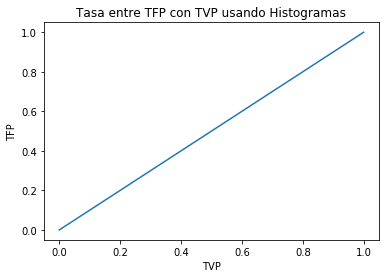

In [61]:
plotHistograma1=plt.plot(TVP,TFP)
plt.ylabel('TFP')
plt.xlabel('TVP')
plt.title('Tasa entre TFP con TVP usando Histogramas')

Text(0.5, 1.0, 'Curva Precision-Recall')

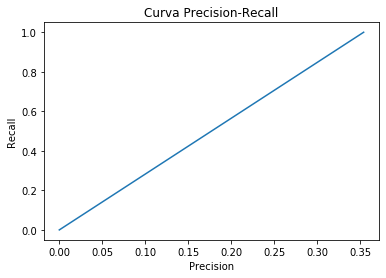

In [51]:
plotHistograma1=plt.plot(p_1,TFP)
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Curva Precision-Recall')

Se puede ver que ninguna curva es mejor que la curva de un clasificador al azar, puesto que son una curva lineal de 1 a 1, como un clasificador al azar.

# Pregunta 3

Ahora hacemos lo mismo que en la pregunta anterior. Se entrena el clasificador con los datos de entrenamiento, los mismos que se usaron en la pregunta 2. Aqui obtenemos la matriz de covarianza y la media de los datos.

Con estos podemos calcular la Gaussiana asociada a estos datos, y comparar cual de las dos verosimilitudes es la más grande.

In [37]:
def EntrenamientoBayesGaussiana(x,classB):
    x=x[x['class']==classB]
    x=x.iloc[:,0:10]
    cov=np.cov(x, rowvar=False)
    mean=np.mean(x)
    return cov,mean

Ahora calculamos la matriz de covarianza y la media para cada clase, usando una rutina.

In [38]:
covClass0,meanClass0 = EntrenamientoBayesGaussiana(testSet,0)
covClass1,meanClass1 = EntrenamientoBayesGaussiana(testSet,1)

### Definimos la verosimilitud y el Clasificador

Esta funcion verosimilitud calcula la Gaussiana usando los valores de covarianza y media dependiendo de la clase, entregando un valor $f$.

Se calcula la Gaussiana para cada clase y se comparan entre ellas, y en base al valor $\theta$, se define si dar 1 o 0.

In [39]:
def VerosimilitudBayesGaussiana(x,classB):
    if (classB==0):
        cov=covClass0
        mean=meanClass0
    else:
        cov=covClass1
        mean=meanClass1
    c=len(cov)
    u=x[0:10]-mean[0:10]
    inverse=np.linalg.inv(cov)
    f=np.exp(-1/2*np.matmul(np.matmul(u,inverse),u))
    f=f/np.sqrt(np.power(2*np.pi,c)*np.linalg.det(cov))
    return f

In [40]:
def ClasificadorBayesGaussiana(x,y,y_p,classA,classB,theta):
    a=0.0
    b=0.0
    c=0.0
    d=0.0
    for i in range(len(x)):
        p_a=VerosimilitudBayesGaussiana(x.iloc[i],classA)
        p_b=VerosimilitudBayesGaussiana(x.iloc[i],classB)
        if (p_a/p_b >= theta):
            y[i]=1
        else:
            y[i]=0
        if (y[i]==y_p[i] and y[i]==1):
            a=a+1
        elif (y_p[i]==y[i] and y_p[i]==0):
            d=d+1
        elif (y_p[i]==1 and y[i]!=y_p[i]):
            c=c+1
        else:
            b=b+1
    
    if(a==0):
        TVP=0
        Precision=0
    else:
        TVP=a/(a+b)
        Precision=a/(a+c)
    
    if(c==0):
        TFP=0
    else:
        TFP=c/(c+d)
    
    return TVP,TFP,Precision

### Curvas ROC y Precision-Recall

Se calculan los valores de TFP, TVP y Precision para $\theta$ de entre 0 a 0.5, con 100 valores.

In [42]:
TVP_2=np.zeros(100)
TFP_2=np.zeros(100)
p_2=np.zeros(100)
classA=1
classB=0

y=np.zeros(len(testSet))

for i in range(len(theta)):
    TVP_1,TFP_1,Precision=ClasificadorBayesGaussiana(testSet,y,y_p,classA,classB,theta[i])
    TVP_2[i]=TVP_1
    TFP_2[i]=TFP_1
    p_2[i]=Precision

c:\users\magicalgirl\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


Text(0.5, 1.0, 'Tasa entre TFP con TVP usando Gaussianas')

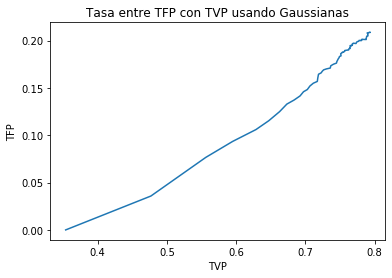

In [43]:
plotGauss1=plt.plot(TVP_2,TFP_2)
plt.ylabel('TFP')
plt.xlabel('TVP')
plt.title('Tasa entre TFP con TVP usando Gaussianas')

Text(0.5, 1.0, 'Curva precision-recall del modelo gaussiano Naive Bayes')

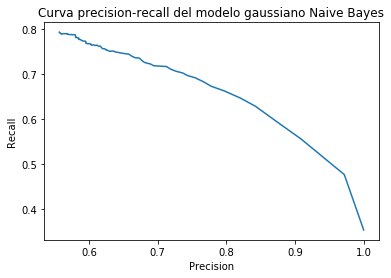

In [44]:
pltGauss2=plt.plot(p_2,TVP_2)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Curva precision-recall del modelo gaussiano Naive Bayes')

Se puede ver que tiene la curva "estándar" Precision-Recall, pero que no es tan "perfecta.

# Pregunta 4

Primero comparamos las dos curvas ROC, de entre los dos modelos.

### Curva ROC

Text(0.5, 1.0, 'Curva ROC en modelo histograma vs modelo Gaussiano')

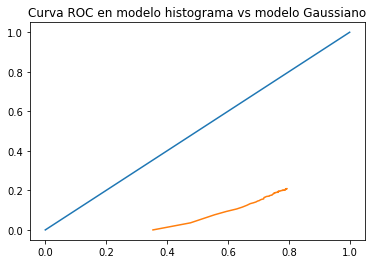

In [45]:
plt.plot(TVP, TFP)
plt.plot(TVP_2,TFP_2)
plt.title('Curva ROC en modelo histograma vs modelo Gaussiano')

### Curva Precision-Recall

Text(0.5, 1.0, 'Curva Precision-Recal en modelo histograma vs modelo Gaussiano')

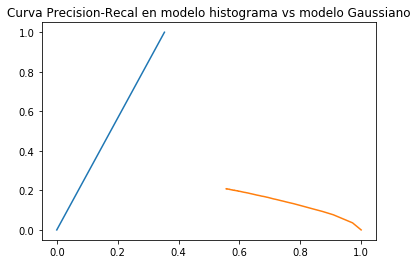

In [47]:
plt.plot(p_1, TFP)
plt.plot(p_2,TFP_2)
plt.title('Curva Precision-Recal en modelo histograma vs modelo Gaussiano')

# Conclusiones

Primero que todo, se puede concluir que al ver los resultados, que la curvas Gaussianas son mejor modelo para este tipo de problemas que usar histogramas. Puesto que tanto su curva ROC como su curva Precision-Recall poseen una mejor "forma", al alejarse más del modelo lineal para la curva ROC, y al acercarse a la curva ideal en la curva Precision-Recall. Ademas de que el entrenamiento de las Gaussianas en mucho más corto (en tiempo) que el modelo de Histogramas, y considerando además el espacio que ocupa, esto hace que el modelo de Gaussianas sea mejor para este tipo de problemas que el modelo de las histogramas.

Suponer que las variables son independientes no es buena idea para este tipo de problema, puesto que hay variables altamente correlacionadas entre sí como lo son 'fSize'-'fWidth' y tambien con 'fLength'. Tambien una variable que se supondria tendria mayor peso al momento de clasificar, sin embargon no impacto tanto como debia era 'fAlpha', puesto que no hay diferencia al momento de clasificar. El modelo Gaussiano que con la matriz de covarianza no asume independencia posee mejores resultados al respecto que el modelo de histogramas que si asume independencia.

Las mayores dificultades al resolver el problema fueron el uso de librerias, principalmente debido a algunas peculiaridades de numpy, en particular para calcular la covarianza. Otro tema, es que eran muchas tareas que programar y el tiempo en probar cada tarea importante, hacia que se generaran dificultades para coordinar el tiempo de trabajo.